Assignment - 2 Cagatay Sahin

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## PART 2

### (a) Transition Matrix

In [15]:
#Cell (j,i) denotes P(top face transition from i to j)
A = np.array(
[[ 0.25, 0   ,  0   ,  0   , 0   ,  0.25],
 [ 0.25, 0.25,  0.25,  0.25, 0.25,  0.25],
 [ 0.25, 0.25,  0   ,  0.5 , 0.25,  0.25],
 [ 0   , 0   ,  0.5 ,  0   , 0   ,  0   ],
 [ 0   , 0.25,  0   ,  0   , 0.25,  0   ],
 [ 0.25, 0.25,  0.25,  0.25, 0.25,  0.25]])

print A

[[ 0.25  0.    0.    0.    0.    0.25]
 [ 0.25  0.25  0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.    0.5   0.25  0.25]
 [ 0.    0.    0.5   0.    0.    0.  ]
 [ 0.    0.25  0.    0.    0.25  0.  ]
 [ 0.25  0.25  0.25  0.25  0.25  0.25]]


### (b) Stationary Distribution of A

In [16]:
eig_val, eig_vec = np.linalg.eig(A)
i = np.argmax(np.isclose(eig_val, 1.0))
stat_dist = eig_vec[:, i] 
stat_dist /= sum(stat_dist) 
print 'Stationary distribution: ', stat_dist 

Stationary distribution:  [ 0.08333333+0.j  0.25000000+0.j  0.22222222+0.j  0.11111111+0.j
  0.08333333+0.j  0.25000000+0.j]


This distribution is not uniform.

### (c) Detailed Balance Condition

In [17]:
prod = np.multiply(A, stat_dist)
print 'Satisfy detailed balance?: ', np.allclose(prod, prod.T)

Satisfy detailed balance?:  False


### (d) T_mix

In [18]:
epsilon = 1e-8
pi = [1,0,0,0,0,0]
T_mix = 1
prod = np.dot(A,pi)
while np.linalg.norm(prod - stat_dist, ord = 1)*0.5 > epsilon:
    prod = np.dot(A,prod)
    T_mix = T_mix + 1
print 'T_mix : ', T_mix    

T_mix :  24


### (e) Intermediary Powers of A

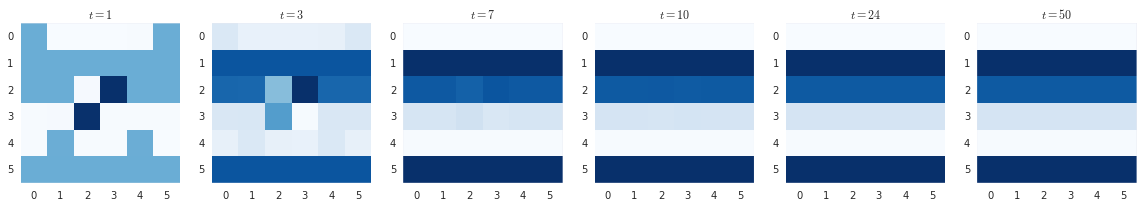

In [35]:
fig, ax = plt.subplots(1, 6, figsize=(20,5))
for i, t in enumerate([1, 3, 7, 10, 24, 50]):
    ax[i].imshow(np.linalg.matrix_power(A, t), interpolation = "none", cmap = "Blues")
    ax[i].set_title("$t = %d$" % t)
fig.show()

### (f) Multiple chain runs

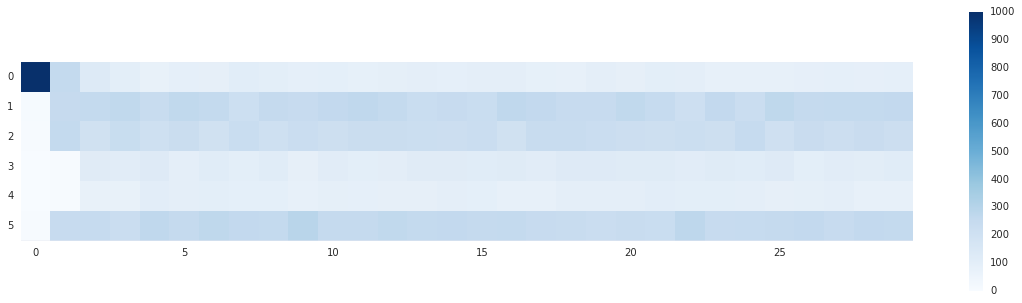

In [67]:
#This method returns single chain
def get_chain(A, chain_len):
    chain = np.zeros(chain_len).astype(int)
    for i in range(1,chain_len):
        prob = A[:, chain[i-1]]
        chain[i] = np.random.choice(range(6), p = prob)
    return chain

#Length of chain
atleast_T_mix = 30
#Number of chains
N = 1000

chains = np.zeros([N, atleast_T_mix]).astype(int)

for i in range(0, N):
    chain = get_chain(A, atleast_T_mix)
    chains[i,:] = chain

#Generate histogram
histogram = np.zeros((6,atleast_T_mix),dtype=np.float)
for i in range(0,atleast_T_mix):
    histogram[:,i], bins = np.histogram(chains[:,i], bins = range(0,7))
    histogram[:,i] = histogram[:,i]

fig, ax = plt.subplots(figsize=(20, 5))
im = ax.imshow(histogram, cmap='Blues', interpolation='none')
fig.colorbar(im)
plt.show()

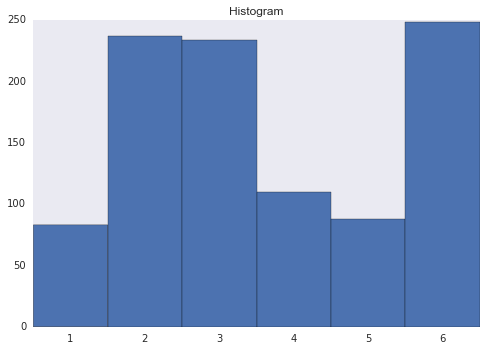

In [106]:
chain = get_chain(A, 1000 + atleast_T_mix)
samples, bins = np.histogram(chain[atleast_T_mix:], bins = range(0,7), density = True)
 
plt.hist( chain[atleast_T_mix:], bins = range(0,7))
plt.title('Histogram')
plt.xticks((np.arange(0,6) + 0.5), range(1,7))
plt.show()

In [92]:
print "First Eigenvector: ", stat_dist;

First Eigenvector:  [ 0.08333333+0.j  0.25000000+0.j  0.22222222+0.j  0.11111111+0.j
  0.08333333+0.j  0.25000000+0.j]


In [108]:
print "Samples: " , samples / sum(samples)

Samples:  [ 0.083  0.237  0.234  0.11   0.088  0.248]


Samples are clearly consistent with the first eigenvector.